<a href="https://colab.research.google.com/github/Catherine-Nguyen88/project_voting/blob/main/Voting_Rhiannon's_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Clone from repo
! git clone https://github.com/Catherine-Nguyen88/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 111 (delta 13), reused 11 (delta 11), pack-reused 90
Receiving objects: 100% (111/111), 34.99 MiB | 4.79 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Updating files: 100% (54/54), done.


In [2]:
#Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

### Taking Isabella's Code and Uploading it to my Voting Part to make summaries?

In [4]:
df = pd.read_csv('./project_voting/data/voting_VA.csv')
df

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,71966,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,24,12113,20220315,ELECTION DAY
3732,71967,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,0,12113,20220315,PROVISIONAL
3733,71968,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2825,12113,20220315,ABSENTEE
3734,71969,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2370,12113,20220315,ELECTION DAY


In [5]:
#Testing demographic file
fname = './project_voting/data/county_data/0002_ds176_20105_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
dem.head()

#Drop first row
dem = dem.drop([0])
dem.head()

#Extracting Virginia data
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
dem_VA.head()

(134, 272)


<ipython-input-5-859999b4270b>:3: DtypeWarning: Columns (3,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,2

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001
2821,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1,NaN,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
2822,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3,NaN,...,5830,10158,7375,6827,3092,2070,816,3053,1031.0,349800
2823,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5,NaN,...,196,944,736,1478,1182,844,687,1849,504.0,104000
2824,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7,NaN,...,739,1173,839,1010,483,317,301,322,672.0,189800
2825,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9,NaN,...,704,2476,2409,2847,1599,1460,592,1454,582.0,142200


In [7]:
# modify the voting csv dataset to match the county names present in the demographics data
# change to title case and if the county doesnt end in "City", add "County"

def match_county_name(county_name):
  if county_name.endswith('CITY'):
    return county_name.title()
  else:
    return county_name.title() + ' County'

voting_df = df.copy()
voting_df['county_name'] = voting_df['county_name'].apply(lambda x: match_county_name(x))

voting_df.head()

# now, for each county, get candidatevotes/totalvotes
voting_df['fractionalvotes'] = voting_df['candidatevotes']/voting_df['totalvotes']
voting_df.head()

# create merged dataframe
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})
dem_VA.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,county_name,COUNTYA,COUSUBA,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001
2821,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1,NaN,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
2822,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3,NaN,...,5830,10158,7375,6827,3092,2070,816,3053,1031.0,349800
2823,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5,NaN,...,196,944,736,1478,1182,844,687,1849,504.0,104000
2824,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7,NaN,...,739,1173,839,1010,483,317,301,322,672.0,189800
2825,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9,NaN,...,704,2476,2409,2847,1599,1460,592,1454,582.0,142200


In [8]:
# merge the datasets
merged_df = voting_df.merge(dem_VA, on='county_name', how='left')
merged_df.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001
0,11161,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
1,11162,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
2,11163,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,RALPH NADER,GREEN,220,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
3,11164,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,OTHER,OTHER,261,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
4,11165,2000,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,...,5830,10158,7375,6827,3092,2070,816,3053,1031.0,349800


In [9]:
#Final Merging
voting_original = pd.read_csv('./project_voting/data/voting_VA.csv')
voting_original.head(5)

# modify voting CSV
def match_county_name(county_name):
  if county_name.endswith('CITY'):
    return county_name.title()
  else:
    return county_name.title() + ' County'

voting_df = voting_original.copy()
voting_df['county_name'] = voting_df['county_name'].apply(lambda x: match_county_name(x))
voting_df.head()

# now, for each county, get candidatevotes/totalvotes
voting_df['fractionalvotes'] = voting_df['candidatevotes']/voting_df['totalvotes']

# split voting data into separate years for merging
voting_2000 = voting_df[voting_df['year']==2000]
voting_2004 = voting_df[voting_df['year']==2004]
voting_2008 = voting_df[voting_df['year']==2008]
voting_2012 = voting_df[voting_df['year']==2012]
voting_2016 = voting_df[voting_df['year']==2016]
voting_2020 = voting_df[voting_df['year']==2020]

## 2000 Election

In [10]:
# 2000 election
# extract demographic data
fname = './project_voting/data/county_data/0002_ds176_20105_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2000 = voting_2000.merge(dem_VA, on='county_name', how='left')
merged_2000.head(5)

na_counts = merged_2000.isna().sum()
print(na_counts)

(134, 272)
Unnamed: 0       0
year             0
state            0
state_po         0
county_name      0
              ... 
JSDE008        152
JSDE009        152
JSDE010        152
JS5E001        152
JTIE001        152
Length: 285, dtype: int64


<ipython-input-10-b981a9e06f33>:4: DtypeWarning: Columns (3,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,

In [73]:
#Votes by county/party
county_party_votes = merged_2000.groupby(['county_name', 'party'])['fractionalvotes'].sum().reset_index()

#Votes for Each County
county_total_votes = county_party_votes.groupby('county_name')['fractionalvotes'].sum().reset_index()

#Merge total votes with county_party_votes to calculate party share
county_party_share = county_party_votes.merge(county_total_votes, on='county_name')
county_party_share['party_share'] = county_party_share['fractionalvotes_x'] / county_party_share['fractionalvotes_y']

#Parties as Columns
party_share_table00 = county_party_share.pivot(index='county_name', columns='party', values='party_share').fillna(0)

# Display the summary table
print(party_share_table00)

party                DEMOCRAT     GREEN     OTHER  REPUBLICAN
county_name                                                  
Accomack County      0.427002  0.018449  0.021887    0.532662
Albemarle County     0.441161  0.055447  0.006975    0.496418
Alexandria County    0.609305  0.037935  0.007772    0.344988
Alleghany County     0.432169  0.012102  0.007613    0.548116
Amelia County        0.366332  0.008354  0.009816    0.615497
...                       ...       ...       ...         ...
Williamsburg County  0.462819  0.050470  0.009664    0.477047
Winchester County    0.420746  0.026503  0.005706    0.547045
Wise County          0.481743  0.012021  0.017581    0.488655
Wythe County         0.338582  0.012910  0.008998    0.639511
York County          0.350730  0.019526  0.006875    0.622869

[129 rows x 4 columns]


In [74]:
highest_dem = party_share_table00['DEMOCRAT'].idxmax()
highest_dem_share = party_share_table00.loc[highest_dem, 'DEMOCRAT']

# Find the county with the highest Republican vote share
highest_rep = party_share_table00['REPUBLICAN'].idxmax()
highest_rep_share = party_share_table00.loc[highest_rep, 'REPUBLICAN']

print(f"County with the highest Democratic vote share: {highest_dem} ({highest_dem_share:.2f}%)")
print(f"County with the highest Republican vote share: {highest_rep} ({highest_rep_share:.2f}%)")

County with the highest Democratic vote share: Petersburg County (0.79%)
County with the highest Republican vote share: Poquoson County (0.73%)


## 2004 Election

In [11]:
#2004 Election
# extract demographic data
fname = './project_voting/data/county_data/0002_ds176_20105_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2004 = voting_2004.merge(dem_VA, on='county_name', how='left')
merged_2004.head(5)

na_counts = merged_2004.isna().sum()
print(na_counts)

(134, 272)
Unnamed: 0       0
year             0
state            0
state_po         0
county_name      0
              ... 
JSDE008        114
JSDE009        114
JSDE010        114
JS5E001        114
JTIE001        114
Length: 285, dtype: int64


<ipython-input-11-4bc1fc12c548>:4: DtypeWarning: Columns (3,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,

In [71]:
#Votes by county/party
county_party_votes = merged_2004.groupby(['county_name', 'party'])['fractionalvotes'].sum().reset_index()

#Votes for Each County
county_total_votes = county_party_votes.groupby('county_name')['fractionalvotes'].sum().reset_index()

#Merge total votes with county_party_votes to calculate party share
county_party_share = county_party_votes.merge(county_total_votes, on='county_name')
county_party_share['party_share'] = county_party_share['fractionalvotes_x'] / county_party_share['fractionalvotes_y']

#Parties as Columns
party_share_table04 = county_party_share.pivot(index='county_name', columns='party', values='party_share').fillna(0)

# Display the summary table
print(party_share_table04)

party                DEMOCRAT     OTHER  REPUBLICAN
county_name                                        
Accomack County      0.413148  0.008386    0.578467
Albemarle County     0.505146  0.010268    0.484586
Alexandria County    0.668390  0.009022    0.322588
Alleghany County     0.445170  0.004170    0.550660
Amelia County        0.345006  0.006670    0.648323
...                       ...       ...         ...
Williamsburg County  0.512963  0.009259    0.477778
Winchester County    0.424596  0.009954    0.565450
Wise County          0.405394  0.012577    0.582029
Wythe County         0.309936  0.005366    0.684698
York County          0.343909  0.006961    0.649130

[129 rows x 3 columns]


In [72]:
highest_dem = party_share_table04['DEMOCRAT'].idxmax()
highest_dem_share = party_share_table04.loc[highest_dem, 'DEMOCRAT']

# Find the county with the highest Republican vote share
highest_rep = party_share_table04['REPUBLICAN'].idxmax()
highest_rep_share = party_share_table04.loc[highest_rep, 'REPUBLICAN']

print(f"County with the highest Democratic vote share: {highest_dem} ({highest_dem_share:.2f}%)")
print(f"County with the highest Republican vote share: {highest_rep} ({highest_rep_share:.2f}%)")

County with the highest Democratic vote share: Petersburg County (0.81%)
County with the highest Republican vote share: Poquoson County (0.77%)


## 2008 Election

In [12]:
#2008 Election
# extract demographic data
fname = './project_voting/data/county_data/0002_ds191_20125_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2008 = voting_2008.merge(dem_VA, on='county_name', how='left')
merged_2008.head(5)

na_counts = merged_2008.isna().sum()
print(na_counts)

(134, 190)
Unnamed: 0       0
year             0
state            0
state_po         0
county_name      0
              ... 
QX8E001        114
QX8E002        114
QX8E003        114
QZTE001        114
QZ6E001        114
Length: 203, dtype: int64


In [69]:
#Votes by county/party
county_party_votes = merged_2008.groupby(['county_name', 'party'])['fractionalvotes'].sum().reset_index()

#Votes for Each County
county_total_votes = county_party_votes.groupby('county_name')['fractionalvotes'].sum().reset_index()

#Merge total votes with county_party_votes to calculate party share
county_party_share = county_party_votes.merge(county_total_votes, on='county_name')
county_party_share['party_share'] = county_party_share['fractionalvotes_x'] / county_party_share['fractionalvotes_y']

#Parties as Columns
party_share_table08 = county_party_share.pivot(index='county_name', columns='party', values='party_share').fillna(0)

# Display the summary table
print(party_share_table08)

party                DEMOCRAT     OTHER  REPUBLICAN
county_name                                        
Accomack County      0.486910  0.011713    0.501376
Albemarle County     0.584340  0.012082    0.403578
Alexandria County    0.717313  0.010090    0.272597
Alleghany County     0.482155  0.013706    0.504139
Amelia County        0.381069  0.010875    0.608056
...                       ...       ...         ...
Williamsburg County  0.637690  0.015618    0.346692
Winchester County    0.520245  0.013135    0.466621
Wise County          0.353303  0.016197    0.630499
Wythe County         0.328797  0.014170    0.657033
York County          0.404166  0.010738    0.585096

[129 rows x 3 columns]


In [70]:
highest_dem = party_share_table08['DEMOCRAT'].idxmax()
highest_dem_share = party_share_table08.loc[highest_dem, 'DEMOCRAT']

# Find the county with the highest Republican vote share
highest_rep = party_share_table08['REPUBLICAN'].idxmax()
highest_rep_share = party_share_table08.loc[highest_rep, 'REPUBLICAN']

print(f"County with the highest Democratic vote share: {highest_dem} ({highest_dem_share:.2f}%)")
print(f"County with the highest Republican vote share: {highest_rep} ({highest_rep_share:.2f}%)")

County with the highest Democratic vote share: Petersburg County (0.89%)
County with the highest Republican vote share: Poquoson County (0.74%)


## 2012 Election

In [13]:
#2012 Election
# extract demographic data
fname = './project_voting/data/county_data/0002_ds206_20145_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2012 = voting_2012.merge(dem_VA, on='county_name', how='left')
merged_2012.head(5)

na_counts = merged_2012.isna().sum()
print(na_counts)

(133, 191)
Unnamed: 0       0
year             0
state            0
state_po         0
county_name      0
              ... 
ABGXE002       114
ABGXE003       114
ABIHE001       114
ABIOE001       114
ABITE001       114
Length: 204, dtype: int64


In [67]:
#Votes by county/party
county_party_votes = merged_2012.groupby(['county_name', 'party'])['fractionalvotes'].sum().reset_index()

#Votes for Each County
county_total_votes = county_party_votes.groupby('county_name')['fractionalvotes'].sum().reset_index()

#Merge total votes with county_party_votes to calculate party share
county_party_share = county_party_votes.merge(county_total_votes, on='county_name')
county_party_share['party_share'] = county_party_share['fractionalvotes_x'] / county_party_share['fractionalvotes_y']

#Parties as Columns
party_share_table12 = county_party_share.pivot(index='county_name', columns='party', values='party_share').fillna(0)

# Display the summary table
print(party_share_table12)

party                DEMOCRAT     OTHER  REPUBLICAN
county_name                                        
Accomack County      0.476917  0.011401    0.511682
Albemarle County     0.552006  0.015824    0.432170
Alexandria County    0.711051  0.013118    0.275831
Alleghany County     0.474418  0.024397    0.501185
Amelia County        0.360087  0.013594    0.626320
...                       ...       ...         ...
Williamsburg County  0.632808  0.021038    0.346154
Winchester County    0.494755  0.024864    0.480381
Wise County          0.250366  0.012119    0.737515
Wythe County         0.306117  0.020311    0.673572
York County          0.388272  0.016670    0.595058

[129 rows x 3 columns]


In [68]:
highest_dem = party_share_table12['DEMOCRAT'].idxmax()
highest_dem_share = party_share_table12.loc[highest_dem, 'DEMOCRAT']

# Find the county with the highest Republican vote share
highest_rep = party_share_table12['REPUBLICAN'].idxmax()
highest_rep_share = party_share_table12.loc[highest_rep, 'REPUBLICAN']

print(f"County with the highest Democratic vote share: {highest_dem} ({highest_dem_share:.2f}%)")
print(f"County with the highest Republican vote share: {highest_rep} ({highest_rep_share:.2f}%)")

County with the highest Democratic vote share: Petersburg County (0.90%)
County with the highest Republican vote share: Tazewell County (0.78%)


## 2016 Election

In [14]:
#2016 Election
# extract demographic data
fname = './project_voting/data/county_data/0002_ds225_20165_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2016 = voting_2016.merge(dem_VA, on='county_name', how='left')
merged_2016.head(5)

na_counts = merged_2016.isna().sum()
print(na_counts)

(133, 186)
Unnamed: 0       0
year             0
state            0
state_po         0
county_name      0
              ... 
AF7PE001       114
AF7PE002       114
AF7PE003       114
AF89E001       114
AF9LE001       114
Length: 199, dtype: int64


In [65]:
#Votes by county/party
county_party_votes = merged_2016.groupby(['county_name', 'party'])['fractionalvotes'].sum().reset_index()

#Votes for Each County
county_total_votes = county_party_votes.groupby('county_name')['fractionalvotes'].sum().reset_index()

#Merge total votes with county_party_votes to calculate party share
county_party_share = county_party_votes.merge(county_total_votes, on='county_name')
county_party_share['party_share'] = county_party_share['fractionalvotes_x'] / county_party_share['fractionalvotes_y']

#Parties as Columns
party_share_table16 = county_party_share.pivot(index='county_name', columns='party', values='party_share').fillna(0)

# Display the summary table
print(party_share_table16)

party                DEMOCRAT     OTHER  REPUBLICAN
county_name                                        
Accomack County      0.426097  0.031293    0.542610
Albemarle County     0.587826  0.072665    0.339509
Alexandria County    0.755471  0.069196    0.175333
Alleghany County     0.295700  0.038908    0.665392
Amelia County        0.302273  0.028977    0.668750
...                       ...       ...         ...
Williamsburg County  0.682665  0.064910    0.252426
Winchester County    0.484110  0.066842    0.449048
Wise County          0.178131  0.024797    0.797072
Wythe County         0.207599  0.039496    0.752904
York County          0.381001  0.066886    0.552113

[129 rows x 3 columns]


In [66]:
highest_dem = party_share_table16['DEMOCRAT'].idxmax()
highest_dem_share = party_share_table16.loc[highest_dem, 'DEMOCRAT']

# Find the county with the highest Republican vote share
highest_rep = party_share_table16['REPUBLICAN'].idxmax()
highest_rep_share = party_share_table16.loc[highest_rep, 'REPUBLICAN']

print(f"County with the highest Democratic vote share: {highest_dem} ({highest_dem_share:.2f}%)")
print(f"County with the highest Republican vote share: {highest_rep} ({highest_rep_share:.2f}%)")

County with the highest Democratic vote share: Petersburg County (0.87%)
County with the highest Republican vote share: Bland County (0.82%)


## 2020 Election

In [15]:
#2020 Election
# extract demographic data
fname = './project_voting/data/county_data/0002_ds249_20205_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2020 = voting_2020.merge(dem_VA, on='county_name', how='left')
merged_2020.head(5)

na_counts = merged_2020.isna().sum()
print(na_counts)

<ipython-input-15-c28d2184fcbc>:4: DtypeWarning: Columns (3,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,

(133, 992)
Unnamed: 0       0
year             0
state            0
state_po         0
county_name      0
              ... 
AMWSE009       500
AMWSE010       500
AMWSE011       500
AMWSE012       500
AMWSE013       500
Length: 1005, dtype: int64


In [63]:
#Votes by county/party
county_party_votes = merged_2020.groupby(['county_name', 'party'])['fractionalvotes'].sum().reset_index()

#Votes for Each County
county_total_votes = county_party_votes.groupby('county_name')['fractionalvotes'].sum().reset_index()

#Merge total votes with county_party_votes to calculate party share
county_party_share = county_party_votes.merge(county_total_votes, on='county_name')
county_party_share['party_share'] = county_party_share['fractionalvotes_x'] / county_party_share['fractionalvotes_y']

#Parties as Columns
party_share_table20 = county_party_share.pivot(index='county_name', columns='party', values='party_share').fillna(0)

# Display the summary table
print(party_share_table20)

party              DEMOCRAT  LIBERTARIAN     OTHER  REPUBLICAN
county_name                                                   
Accomack County    0.446763     0.011084  0.001415    0.540738
Albemarle County   0.656789     0.015683  0.005769    0.321759
Alexandria City    0.802705     0.012385  0.008664    0.176246
Alleghany County   0.273437     0.010850  0.001463    0.714251
Amelia County      0.305422     0.010134  0.001647    0.682797
...                     ...          ...       ...         ...
Williamsburg City  0.695210     0.013353  0.006531    0.284906
Winchester City    0.545695     0.017584  0.005696    0.431025
Wise County        0.187180     0.006500  0.001866    0.804454
Wythe County       0.208519     0.011278  0.001791    0.778412
York County        0.455853     0.017530  0.004821    0.521796

[133 rows x 4 columns]


In [64]:
highest_dem = party_share_table20['DEMOCRAT'].idxmax()
highest_dem_share = party_share_table20.loc[highest_dem, 'DEMOCRAT']

# Find the county with the highest Republican vote share
highest_rep = party_share_table20['REPUBLICAN'].idxmax()
highest_rep_share = party_share_table20.loc[highest_rep, 'REPUBLICAN']

print(f"County with the highest Democratic vote share: {highest_dem} ({highest_dem_share:.2f}%)")
print(f"County with the highest Republican vote share: {highest_rep} ({highest_rep_share:.2f}%)")

County with the highest Democratic vote share: Petersburg City (0.88%)
County with the highest Republican vote share: Lee County (0.84%)


## More Code for Combined Visualizations


In [17]:
#Combining all year voting data
dfs = [merged_2000, merged_2004, merged_2008, merged_2012, merged_2016, merged_2020]

#Finding common columns
com_cols = set.intersection(*[set(df.columns) for df in dfs])

#Same columns
common = [df[list(com_cols)] for df in dfs]

#Combining along row
VA_voting = pd.concat(common, ignore_index=True)
print(VA_voting.shape)
VA_voting.head()

#Counting number of NA's
na_counts = VA_voting.isna().sum()
print(na_counts)

(3736, 53)
CBSAA              3736
state                 0
STUSAB             1108
CDCURRA            3736
AITSCEA            3736
METDIVA            3736
PCI                3736
year                  0
county_name           0
candidate             0
fractionalvotes       3
TRUSTA             3736
candidatevotes        0
party                 0
PLACEA             3736
mode                  0
UAA                3736
SDELMA             3736
office                0
NAME               1108
NECTADIVA          3736
state_po              0
GEOID              1108
BTBGA              3736
version               0
BTTRA              3736
AIHHTLI            3736
REGIONA            3736
NECTAA             3736
ANRCA              3736
YEAR               1108
totalvotes            0
TRACTA             3736
COUNTYA            1108
county_fips           0
SLDLA              3736
RES_ONLYA          3736
SDUNIA             3736
CSAA               3736
SUBMCDA            3736
GISJOIN            1108
DIVIS

In [18]:
#Dropping columns where all values are NA's
VA_voting1 = VA_voting.dropna(axis=1, how='all')
print(VA_voting1.shape)

VA_voting1.head()

#Counting number of NA's
na_counts = VA_voting1.isna().sum()
print(na_counts)

(3736, 22)
state                 0
STUSAB             1108
year                  0
county_name           0
candidate             0
fractionalvotes       3
candidatevotes        0
party                 0
mode                  0
office                0
NAME               1108
state_po              0
GEOID              1108
version               0
YEAR               1108
totalvotes            0
COUNTYA            1108
county_fips           0
GISJOIN            1108
Unnamed: 0            0
STATE              1108
STATEA             1108
dtype: int64


## EDA

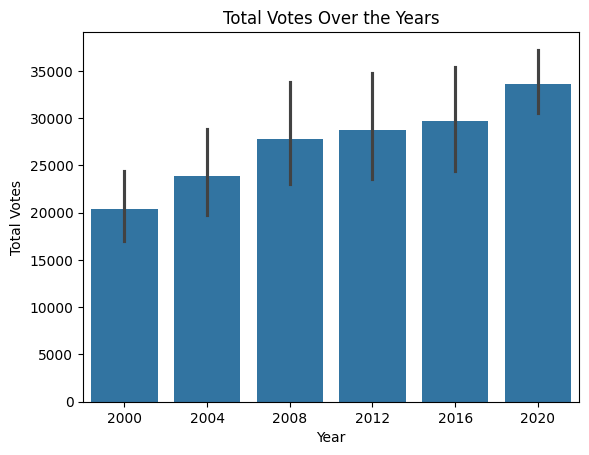

In [19]:
#Total Votes over the year
sns.barplot(x='year', y='totalvotes', data=VA_voting1)
plt.title('Total Votes Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.show()

<Figure size 1200x600 with 0 Axes>

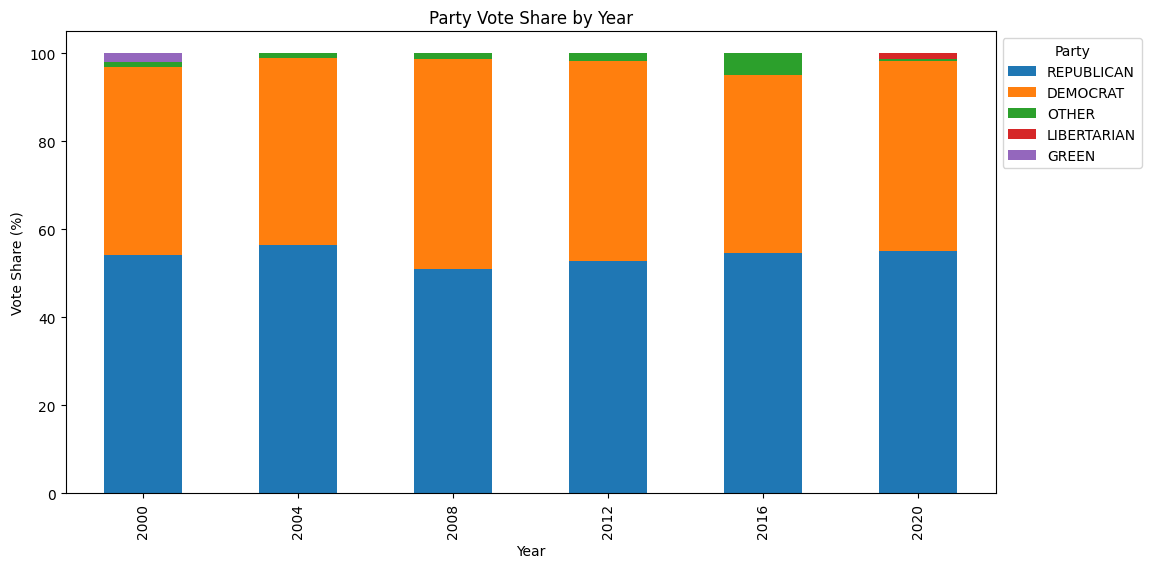

In [43]:
#Party Share by Year

#Order
party_order = ['REPUBLICAN', 'DEMOCRAT', 'OTHER', 'LIBERTARIAN', 'GREEN']

#Calculate party-wise fractional votes per year
party_yr_votes = VA_voting1.groupby(['year', 'party'])['fractionalvotes'].sum().reset_index()

#Parties as columns
party_yr = party_yr_votes.pivot(index='year', columns='party', values='fractionalvotes').fillna(0)

#Total vote share per year
party_yr['total'] = party_yr.sum(axis=1)

#Percentage of each party
party_yr_pct = party_yr.div(party_yr['total'], axis=0) * 100
party_yr_order = party_yr_pct[party_order]

#Plot a stacked bar plot for party vote share by year
plt.figure(figsize=(12, 6))
party_yr_order.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Party Vote Share by Year')
plt.xlabel('Year')
plt.ylabel('Vote Share (%)')
plt.legend(title='Party', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

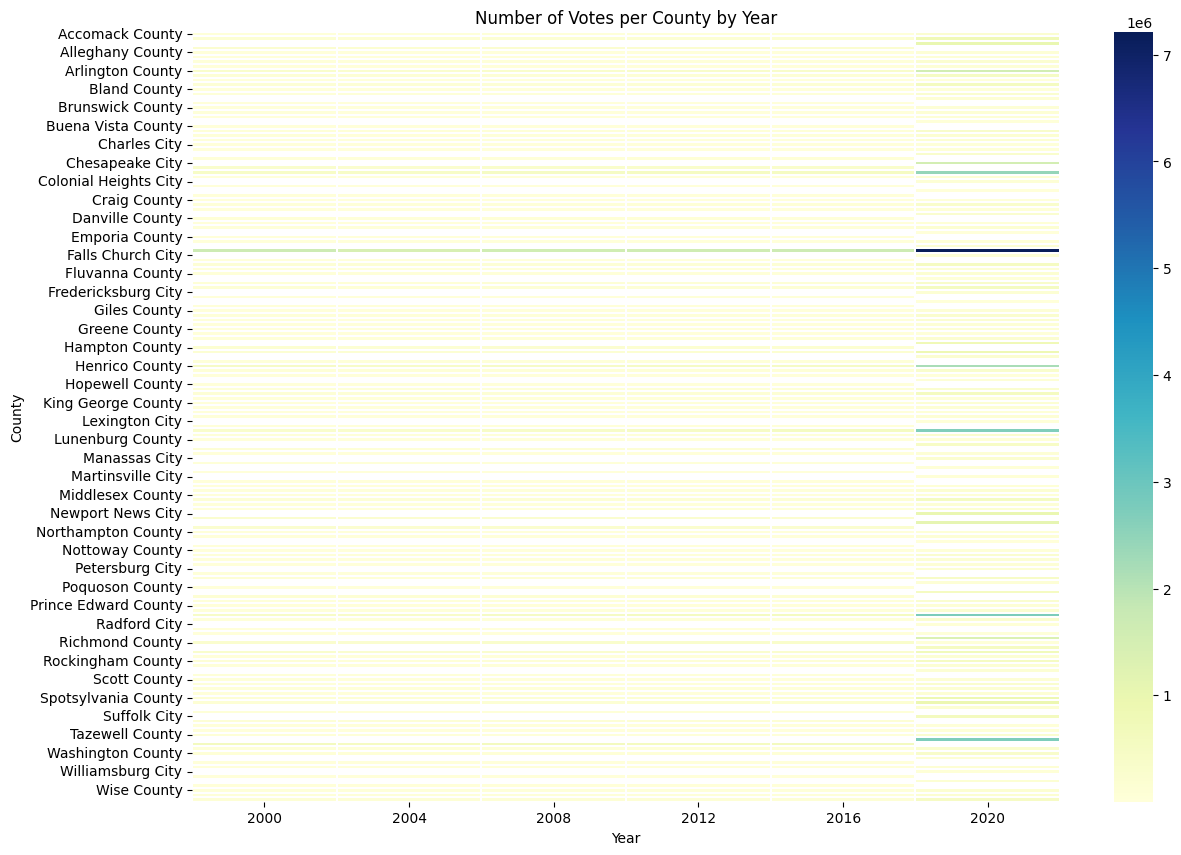

In [30]:
#Count-Wide Votes by year
#Calculate total votes per county and year
county_yr_votes = VA_voting1.groupby(['year', 'county_name'])['totalvotes'].sum().reset_index()

#Years as columns
county_year = county_yr_votes.pivot(index='county_name', columns='year', values='totalvotes')

#Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(county_year, cmap='YlGnBu', linecolor='white', linewidth=0.1)
plt.title('Number of Votes per County by Year')
plt.xlabel('Year')
plt.ylabel('County')
plt.show()

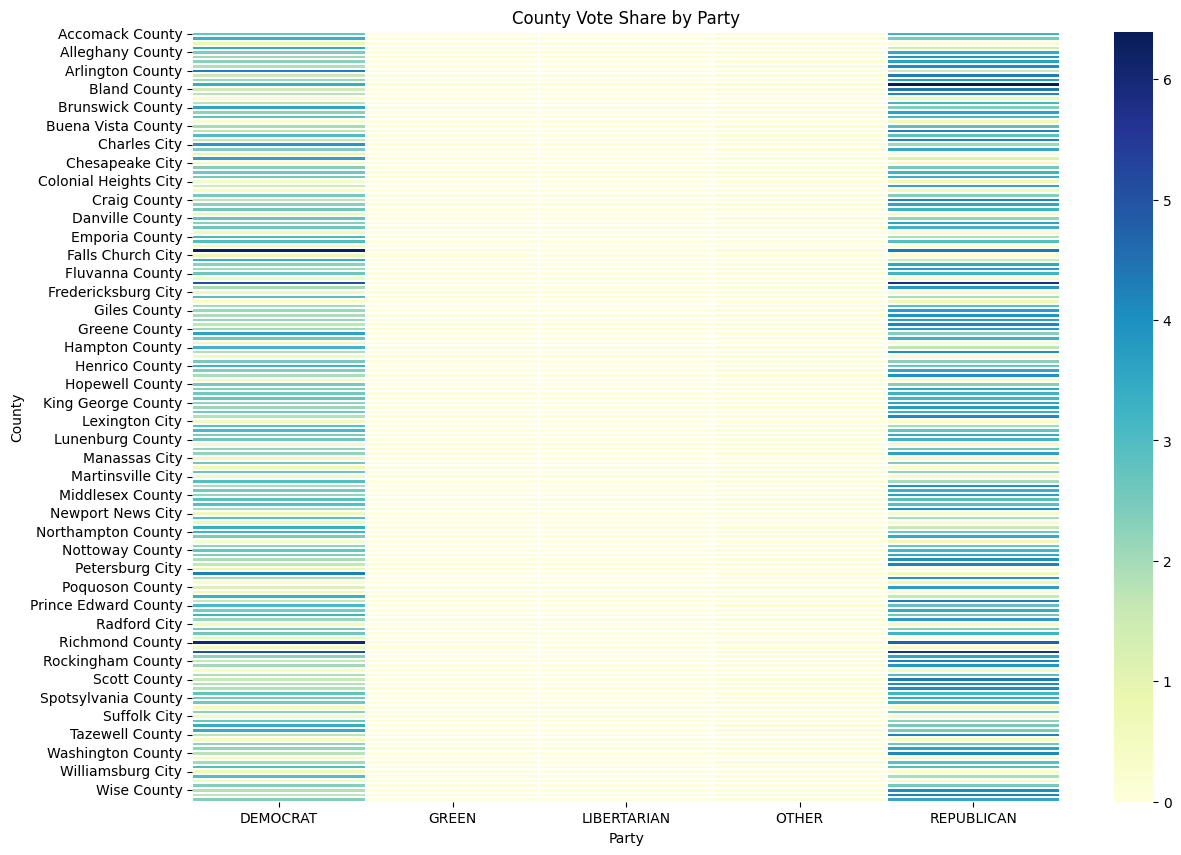

In [44]:
#County-wide Votes by Party
county_party_votes = VA_voting1.groupby(['county_name', 'party'])['fractionalvotes'].sum().reset_index()

#Parties as Columns
county_party = county_party_votes.pivot_table(index='county_name', columns='party', values='fractionalvotes', fill_value=0)

# Plot a heatmap for county vote share by party
plt.figure(figsize=(14, 10))
sns.heatmap(county_party_votes, cmap='YlGnBu', linecolor='white', linewidth=0.1)
plt.title('County Vote Share by Party')
plt.xlabel('Party')
plt.ylabel('County')
plt.show()